In [20]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
data = MNIST(root = '/content/', download = True)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:10<00:00, 904kB/s] 


Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 65.6kB/s]


Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:06<00:00, 242kB/s]


Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.43MB/s]

Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw



In [3]:
data.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [4]:
data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [5]:
print(data.data.shape)
print(data.targets.shape)

torch.Size([60000, 28, 28])
torch.Size([60000])


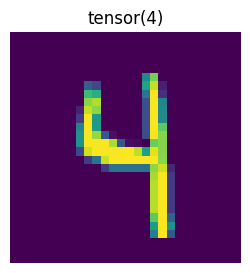

In [7]:
ind = np.random.randint(0, 60000)
img = data.data[ind].numpy()
plt.figure(figsize=(3, 3))
plt.imshow(img)
plt.title(str(data.targets[ind]))
plt.axis('off')
plt.show()

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else  'cpu')
print(device)


cuda


# Changed data to device

In [10]:
X = data.data.to(device)
Y = data.targets.to(device)

# Muestra las formas de los tensores
print("Forma de X:", X.shape)
print("Forma de Y:", Y.shape)

Forma de X: torch.Size([60000, 28, 28])
Forma de Y: torch.Size([60000])


In [11]:
# Create the list of tuples with an additional dimension for each input tensor
data = [(torch.unsqueeze(xi, 0), yi) for xi, yi in zip(X, Y)]

# Access the first tag in the list
first_tag = data[0][1]

# Show the first label
print("First tag:", first_tag)

First tag: tensor(5, device='cuda:0')


In [13]:
#Dataloader
data_loader = DataLoader(data, batch_size=45000, shuffle=True)

In [15]:
#Modelo:
model = torch.nn.Sequential(
    torch.nn.Conv2d(in_channels=1, out_channels=6, padding=1, kernel_size=5),#como los datos son escala 1 porque es grises, el in_channels es 1(se le puede poner el stride), y saca 6 capas nuevas
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=2, stride=2),#reduce el tamaño de la imagen a la mitad
	  torch.nn.Conv2d(in_channels=6, out_channels=16, padding=1, kernel_size=5),
	  torch.nn.ReLU(),
	  torch.nn.MaxPool2d(kernel_size=2, stride=2),
	  torch.nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5),#queda un vector de  120 features que se le pasa a la red
	  torch.nn.ReLU(),
    torch.nn.Flatten(),
	  torch.nn.Linear(120, 84),
	  torch.nn.ReLU(),
	  torch.nn.Linear(84, 10),
		torch.nn.Dropout(p=0.5),
  	torch.nn.LogSoftmax(dim = -1)
).to(device)


In [16]:
learning_rate = 1e-5
#Función de error.
loss_fn=torch.nn.CrossEntropyLoss() #Función adecuada para procesos de clasificación
#Optimizador
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.7)

In [17]:
#Proceso de entrenamiento:
errores=[]
for epoch in range(400):
  for xi,yi in data_loader:
    optimizer.zero_grad()
    y_pred = model(xi.float())
    loss = loss_fn(y_pred, yi)
    loss.backward()
    optimizer.step()
    errores.append(loss.cpu().detach().item())
  if(epoch % 20==0):

    print('Epoch: ', epoch, ', Loss: ',loss.item())


Epoch:  0 , Loss:  4.502639293670654
Epoch:  20 , Loss:  3.028534412384033
Epoch:  40 , Loss:  2.7502198219299316
Epoch:  60 , Loss:  2.578470230102539
Epoch:  80 , Loss:  2.476834297180176
Epoch:  100 , Loss:  2.3774755001068115
Epoch:  120 , Loss:  2.2720959186553955
Epoch:  140 , Loss:  2.1989002227783203
Epoch:  160 , Loss:  2.1598494052886963
Epoch:  180 , Loss:  2.098766326904297
Epoch:  200 , Loss:  2.055736541748047
Epoch:  220 , Loss:  2.0057806968688965
Epoch:  240 , Loss:  1.989001750946045
Epoch:  260 , Loss:  1.9576154947280884
Epoch:  280 , Loss:  1.9196358919143677
Epoch:  300 , Loss:  1.9006168842315674
Epoch:  320 , Loss:  1.8567509651184082
Epoch:  340 , Loss:  1.8425625562667847
Epoch:  360 , Loss:  1.818109393119812
Epoch:  380 , Loss:  1.8085837364196777


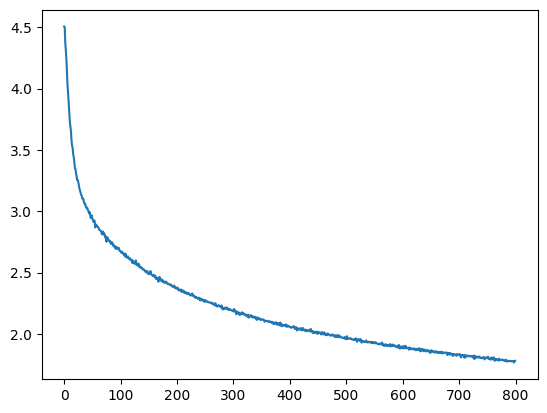

In [18]:
plt.plot(errores)
plt.show()

In [19]:
data = MNIST(root='/content/',download=True,train=False)
X=data.data.float().to(device)
Y=data.targets.long().to(device)
print(X.shape)
print(Y.shape)

torch.Size([10000, 28, 28])
torch.Size([10000])


In [21]:
# Make predictions on the input data
y_pred = model(X.unsqueeze(1)) # Add a dimension for the channel
# Get the classes with the highest probability
y_pred = torch.argmax(y_pred, dim=1)
# Convert tensors to numpy arrays
y_real = Y.cpu().numpy()
y_pred = y_pred.cpu().numpy()

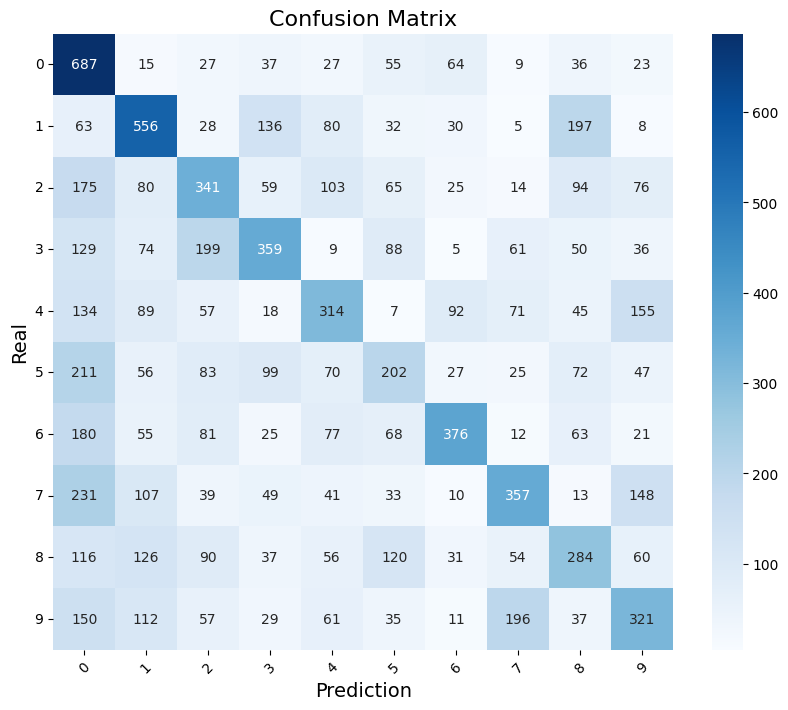

In [23]:
# Calculate the confusion matrix
cm = confusion_matrix(y_real, y_pred, labels=np.arange(10))

# Configure the figure and heat map
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
             xticklabels=np.arange(10), yticklabels=np.arange(10))

# Set titles and labels
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Prediction', fontsize=14)
plt.ylabel('Real', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [25]:
import torch
import json

torch.save(model.state_dict(), 'model_state.pth')

model_config = {
    'layers': [
        {'type': 'Conv2d', 'params': {'in_channels': 1, 'out_channels': 6, 'kernel_size': 5, 'padding': 1}},
        {'type': 'ReLU', 'params': {}},
        {'type': 'MaxPool2d', 'params': {'kernel_size': 2, 'stride': 2}},
        {'type': 'Conv2d', 'params': {'in_channels': 6, 'out_channels': 16, 'kernel_size': 5, 'padding': 1}},
        {'type': 'ReLU', 'params': {}},
        {'type': 'MaxPool2d', 'params': {'kernel_size': 2, 'stride': 2}},
        {'type': 'Conv2d', 'params': {'in_channels': 16, 'out_channels': 120, 'kernel_size': 5}},
        {'type': 'ReLU', 'params': {}},
        {'type': 'Flatten', 'params': {}},
        {'type': 'Linear', 'params': {'in_features': 120, 'out_features': 84}},
        {'type': 'ReLU', 'params': {}},
        {'type': 'Linear', 'params': {'in_features': 84, 'out_features': 10}},
        {'type': 'LogSoftmax', 'params': {'dim': -1}}
    ]
}

with open('model_config.json', 'w') as json_file:
    json.dump(model_config, json_file, indent=4)